In [1]:
# Imports
import numpy  as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
#matplotlib inline

In [2]:
import pandas as pd
X=pd.read_csv("mnist_784.csv")

L'ensemble de données MNIST se compose de 70 000 images de chiffres manuscrits individuels. Chaque image est une image en niveaux de gris de 28x28 pixels. Pour plus de commodité, chaque image de 28x28 pixels est souvent décomposée en un seul vecteur d'éléments de 784 (= 28x28), de sorte que l'ensemble de données est représenté sous la forme d'une matrice de 70 000 x 784. Chaque ligne représente une image différente et chaque colonne représente un pixel différent.

Entrez la cellule suivante pour charger le jeu de données MNIST et tracer les neuf premières images. Le chargement peut prendre quelques minutes.


In [3]:
def plot_MNIST_sample(X):
  """
  Plots 9 images in the MNIST dataset.

  Args:
     X (numpy array of floats) : Data matrix each column corresponds to a
                                 different random variable
  Returns:
    Nothing.

  """
  fig, ax = plt.subplots()
  k = 0
  for k1 in range(3):
    for k2 in range(3):
      k = k + 1
      plt.imshow(np.reshape(X[k, :], (28, 28)),
                 extent=[(k1 + 1) * 28, k1 * 28, (k2+1) * 28, k2 * 28],
                 vmin=0, vmax=255)
  plt.xlim((3 * 28, 0))
  plt.ylim((3 * 28, 0))
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  plt.clim([0, 250])
  ax.set_xticks([])
  ax.set_yticks([])
  plt.show()


In [4]:
X.shape


(70000, 785)

In [5]:
X.head(10).loc[2,'pixel5']


0

In [6]:
X.head(10).iloc[0:2,:]


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X.head(10).loc[2,'class'] 

4

In [8]:
#Tests commandes utiles pour visualiser les données

for k in X.head(3).iterrows():
 test=X.loc[k[0],'class']
 print(k[0],test) 

0 5
1 0
2 4


In [9]:
for k in X.head(1).iterrows():
  print(k)
    

(0, pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel781    0
pixel782    0
pixel783    0
pixel784    0
class       5
Name: 0, Length: 785, dtype: int64)


In [10]:
#(je garde la cellule pour rappel : procedure de test de iterrows et itertuples )
X.head(1)

for index, row in X.head(1).iterrows():
 print(index)  
 print(row)

for row in X.head(1).itertuples():
 print(row[0])
 print(row)

0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel781    0
pixel782    0
pixel783    0
pixel784    0
class       5
Name: 0, Length: 785, dtype: int64
0
Pandas(Index=0, pixel1=0, pixel2=0, pixel3=0, pixel4=0, pixel5=0, pixel6=0, pixel7=0, pixel8=0, pixel9=0, pixel10=0, pixel11=0, pixel12=0, pixel13=0, pixel14=0, pixel15=0, pixel16=0, pixel17=0, pixel18=0, pixel19=0, pixel20=0, pixel21=0, pixel22=0, pixel23=0, pixel24=0, pixel25=0, pixel26=0, pixel27=0, pixel28=0, pixel29=0, pixel30=0, pixel31=0, pixel32=0, pixel33=0, pixel34=0, pixel35=0, pixel36=0, pixel37=0, pixel38=0, pixel39=0, pixel40=0, pixel41=0, pixel42=0, pixel43=0, pixel44=0, pixel45=0, pixel46=0, pixel47=0, pixel48=0, pixel49=0, pixel50=0, pixel51=0, pixel52=0, pixel53=0, pixel54=0, pixel55=0, pixel56=0, pixel57=0, pixel58=0, pixel59=0, pixel60=0, pixel61=0, pixel62=0, pixel63=0, pixel64=0, pixel65=0, pixel66=0, pixel67=0, pixel68=0, pixel69=0, pixel70=0, pixel71=0, pixel72=0, pixel73=

In [11]:
Pixels=X.drop(columns=["class"])
#print(Pixels)

In [12]:
Pixels.shape

(70000, 784)

In [13]:
#Tests commandes utiles pour visulaisier les données
Pixels.max(axis='columns').max('index')
Pixels.max(axis='columns')
Pixels_max=np.max(Pixels,1)
Pixels_max=np.max(Pixels)
print(Pixels_max)

pixel1       0
pixel2       0
pixel3       0
pixel4       0
pixel5       0
            ..
pixel780    62
pixel781     0
pixel782     0
pixel783     0
pixel784     0
Length: 784, dtype: int64


/home/acer/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [14]:
from sklearn import preprocessing
scaler= preprocessing.StandardScaler().fit(Pixels)
#barycentres des variables
scaler.mean_
#déviation standard (écrats types) des variables
scaler.scale_
#Données réduites (variables centrées et réduites )
Pixels_scaled = scaler.transform(Pixels)

# Moyennes nulles) pour les 784 variables réduites : Pixel_scaled_k
Pixels_scaled.mean(axis=0)
#deviations standars pour les 784 variables réduites : Pixel_scaled_k
Pixels_scaled.std(axis=0)[1:100]  

#Pixels_scaled.std(axis=0).shape
#Pixels_corr=Pixels._scaled.corr()


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [15]:
print(scaler.scale_.shape)
print(type(scaler.scale_))
# Pour lareconstruction des données ci dessous
std_vector=scaler.scale_.reshape(-1,1)
print(std_vector.shape)

(784,)
<class 'numpy.ndarray'>
(784, 1)


In [16]:
for k in range(1,len(std_vector)):
  if   std_vector[k] ==0: 
   Pixels=Pixels.drop("pixel"+ str(k), axis='columns') 
   print("pixels"+ str(k))
    
Pixels.shape 

(70000, 784)

In [17]:
from sklearn.preprocessing import scale
#pca.fit(scale(Pixels))  (à tester....pour voir la différence avec StandardScaler()  !!!)

from sklearn.decomposition import PCA
PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
pca=PCA()
pca.fit(Pixels_scaled)


PCA()

In [18]:
# Output de l'ACP, variance expliquée par axe, variance expliquée en %,
# variance cumulée en % pour les 'p' axes de vecteurs directeurs les vecteurs propres 
eig = pd.DataFrame(
    {   "Dimension" : ["Dim" + str(x + 1) for x in range(784)], 
        "Varianceexpliquée" : pca.explained_variance_,
        "%variance_expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "cumvarexpliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)

eig


,Dimension,Varianceexpliquée,%variance_expliquée,cumvarexpliquée
0,Dim1,4.057173e+01,6.0,6.0
1,Dim2,2.905683e+01,4.0,10.0
2,Dim3,2.687857e+01,4.0,13.0
3,Dim4,2.080096e+01,3.0,16.0
4,Dim5,1.812446e+01,3.0,19.0
...,...,...,...,...
779,Dim780,1.048038e-31,0.0,100.0
780,Dim781,6.063685e-32,0.0,100.0
781,Dim782,4.980115e-32,0.0,100.0
782,Dim783,2.172435e-32,0.0,100.0


In [19]:
#matrice des vecteurs propres
U=pca.components_ 
U.shape

(784, 784)

In [20]:
def plot_variance_explained(variance_explained):
  """
  Plots eigenvalues.

  Args:
    variance_explained (numpy array of floats) : Vector of variance explained
                                                 for each PC
  Returns:
    Nothing.

  """
  plt.figure()
  plt.plot(np.arange(1, len(variance_explained) + 1), variance_explained,
           '--k')
  plt.xlabel('Number of components')
  plt.ylabel('Variance explained')
  plt.show()


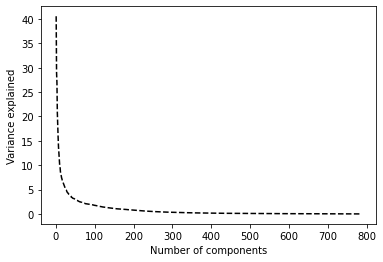

In [21]:
plot_variance_explained(pca.explained_variance_)


In [22]:
def plot_eigenvalues(evals, limit=True):
  """
  Plots eigenvalues.

  Args:
     (numpy array of floats) : Vector of eigenvalues

  Returns:
    Nothing.

  """

  plt.figure()
  plt.plot(np.arange(1, len(evals) + 1), evals, 'o-k')
  plt.xlabel('Component')
  plt.ylabel('Eigenvalue')
  plt.title('Scree plot')
  if limit:
    plt.show()

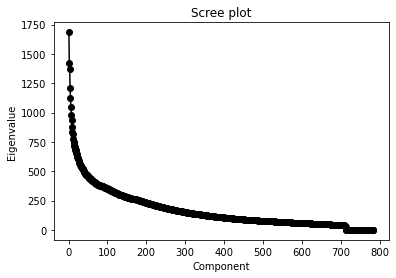

In [23]:
plot_eigenvalues(pca.singular_values_, limit=True)

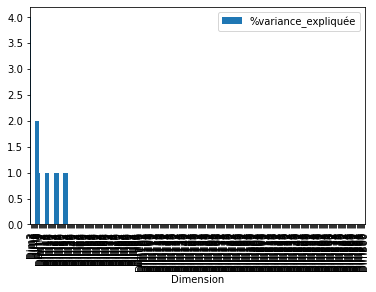

In [24]:
eig.iloc[1:300].plot.bar(x = "Dimension", y = "%variance_expliquée") 
# permet un diagramme en barres
plt.show()

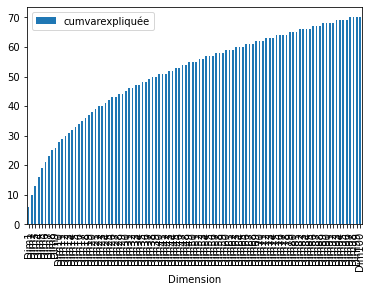

In [25]:
eig.head(100).plot.bar(x = "Dimension", y = "cumvarexpliquée") 
# permet un diagramme en barres
plt.show()

In [26]:
Psi = pca.transform(Pixels_scaled)
Psi_df = pd.DataFrame({
    "Dim1" : Psi[:,0], 
    "Dim2" : Psi[:,1],
    "chiffre" : X["class"]
})

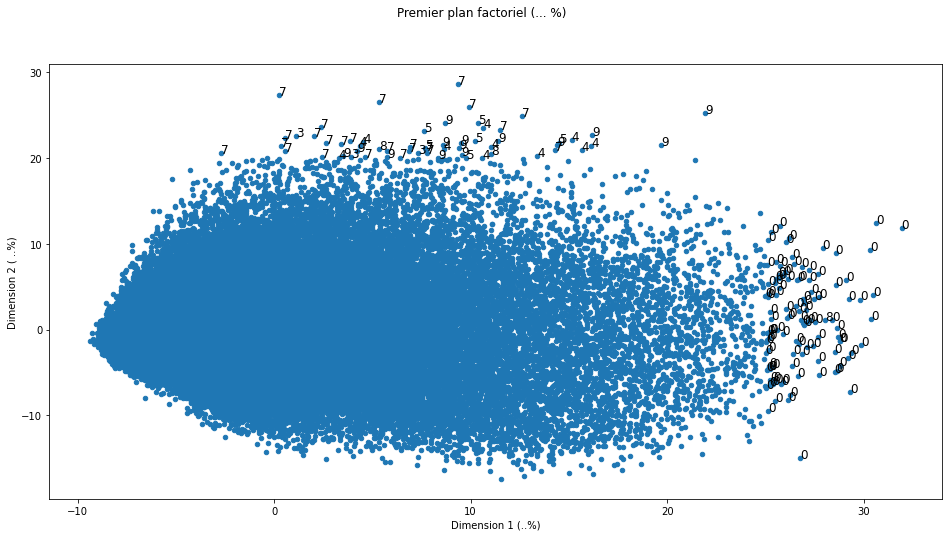

In [27]:
# utilisation de subplots nécessaire car annotation du graphique
fig, ax = plt.subplots(figsize = (16,8))
# l'option ax permet de placer les points et le texte sur le même graphique
Psi_df.plot.scatter("Dim1", "Dim2", ax = ax) 

# boucle sur chaque chiffre
for k in Psi_df.iterrows():
    # annotation uniquement si valeur absolue sur une de 2 dimensions importantes (valeurs choisies empiriquement)
    if (abs(k[1]['Dim1']) > 25) | (abs(k[1]['Dim2']) > 20):
                     ax.annotate( X.loc[k[0],'class'], (k[1]['Dim1'], k[1]['Dim2']), fontsize = 12)
plt.xlabel("Dimension 1 (..%)") 
plt.ylabel("Dimension 2 ( ..%)")
plt.suptitle("Premier plan factoriel (... %)")
plt.show()

Dans la suite , on va voir comment on peut choisir un nombre restreint 
des axes de projection puis comment reconstruire les données à partir 
des données projetés sur ces axes


In [28]:
# Maintenant On peut chercher le Nombre total d'axes (de lignes) pour lesquels la variance cumulée 
# est < 95% dans eig
K=eig.query( 'cumvarexpliquée < 90.0').shape[0]
K

231

## Nouvelle PCA (vairace cumulée 0.9  )

Refaire la PCA mais ne garder que les axes pour lesquels l'inertie (variance) cumulée est de 0.9

In [29]:
# Une autre possibilité,  Au lieu d'appeler pca =  PCA(n_components=231) pour ne garder que les 182 vecteurs, 
#on  cherche la PCA pour laquelle le ratio cumulé est de 90%
from sklearn.decomposition import PCA
#from sklearn.preprocessing import scale
pcaa =  PCA(n_components=0.9,svd_solver='full')

pcaa.fit(Pixels_scaled)

PCA(n_components=0.9, svd_solver='full')

In [30]:
Psi_K = pcaa.transform(Pixels_scaled)
print("Psi_K",type(Psi_K),np.shape(Psi_K))
U_K=pcaa.components_ 
print("U",type(U_K),np.shape(U_K))
K=U_K.shape[0]
# .T =transposée 
print(U_K.T.dtype,np.shape(U_K.T))

Psi_K <class 'numpy.ndarray'> (70000, 238)
U <class 'numpy.ndarray'> (238, 784)
float64 (784, 238)


In [31]:
#procédure pour comparer le retour de Psi_K et de Psii = Pixels_scaled*U_K 
# (U_K matrice V.propres tronquée)
# Psii=np.dot(Pixels_scaled,U_K.transpose()) 
Psii=np.dot(Pixels_scaled,U_K.T )
print("max",np.max(Psi_K-Psii))

max 1.4210854715202004e-14


In [32]:
eig = pd.DataFrame(
    {   "Dimension" : ["Dim" + str(x + 1) for x in range(K)], 
        "Varianceexpliquée" : pcaa.explained_variance_,
        "%variance_expliquée" : np.round(pcaa.explained_variance_ratio_ * 100),
        "cumvarexpliquée" : np.round(np.cumsum(pcaa.explained_variance_ratio_) * 100)
    }
)
eig

,Dimension,Varianceexpliquée,%variance_expliquée,cumvarexpliquée
0,Dim1,40.571729,6.0,6.0
1,Dim2,29.056829,4.0,10.0
2,Dim3,26.878569,4.0,13.0
3,Dim4,20.800965,3.0,16.0
4,Dim5,18.124464,3.0,19.0
...,...,...,...,...
233,Dim234,0.574495,0.0,90.0
234,Dim235,0.566375,0.0,90.0
235,Dim236,0.561708,0.0,90.0
236,Dim237,0.558907,0.0,90.0


# # # Procédure de Reconstruction

In [33]:
std_vector.T.shape
print(np.ones(784).shape)
#transforemr en vecteur ligne
np.ones(784).reshape(-1,1).shape


(784,)


(784, 1)

In [34]:
print("Shape of U:", U.T.shape)
print("Shape of Psi:", Psi.shape)


Shape of U: (784, 784)
Shape of Psi: (70000, 784)


In [61]:
print(type(std_vector))
#=diag(std_vector)  ! ne fonctionne pas pour donner une matrice diag
S_racine=np.diag(scaler.scale_)
 
print(S_racine.shape)
print(len(std_vector))
print(scaler.mean_.reshape(1,-1).shape)
print(np.ones(784).reshape(-1,1).shape)
"""
# compute the projection of the input data onto the principal components
proj = np.dot(Pixels_scaled, U.T)

# compute the reconstructed pixels
Pixels_r = np.dot(proj, S_racine.T)
Pixels_r = np.dot(Pixels_r, Psi.T)
Pixels_r = Pixels_r + snp.dot(scaler.mean_.T.reshape(1,-1),np.ones(784).reshape(-1,1))
"""
"""
#Pixels_r=np.dot(Psi_K,U_K)
Pixels_r=np.dot(Psi,U.T)
Pixels_r=np.dot(Pixels_r,S_racine)
Pixels_r=Pixels_r + np.dot(scaler.mean_.T.reshape(1,-1),np.ones(784).reshape(-1,1))
Pixels_r.shape"""

"""
Psi = U_K[:,:198]

Pixels_r = np.dot(Psi,np.dot(U_K,
                             .T)) + scaler.mean_"""
pixels_projected = np.dot(Psi, pca.components_[:198, :])
pixels_rescaled = np.dot(proj, np.linalg.inv(S_racine))
pixels_r = scaler.inverse_transform(pixels_rescaled)



<class 'numpy.ndarray'>
(784, 784)
784
(1, 784)
(784, 1)


In [65]:
print(Pixels_r.shape)
print(Pixels.shape)
print(Pixels_scaled.shape)
print(eig.shape)
print(Psi.shape)
print(pca.components_.shape)
print(S_racine.shape)
print(U_K.shape)
print(proj.shape)

(70000, 784)
(70000, 784)
(70000, 784)
(238, 4)
(238, 198)
(784, 784)
(784, 784)
(238, 784)
(70000, 784)


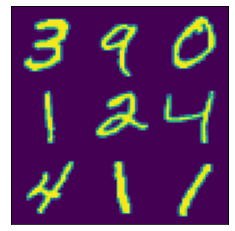

In [43]:
Pixels_array = Pixels.to_numpy()
plot_MNIST_sample(Pixels_array)   

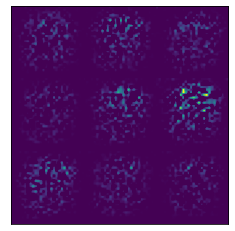

In [63]:
plot_MNIST_sample(Pixels_r)

In [45]:
def plot_MNIST_reconstruction(X, X_reconstructed):
  """
  Plots 9 images in the MNIST dataset side-by-side with the reconstructed
  images.

  Args:
    X (numpy array of floats)               : Data matrix each column
                                              corresponds to a different
                                              random variable
    X_reconstructed (numpy array of floats) : Data matrix each column
                                              corresponds to a different
                                              random variable

  Returns: Nothing.
  """

  plt.figure()
  ax = plt.subplot(121)
  k = 0
  for k1 in range(3):
    for k2 in range(3):
      k = k + 1
      plt.imshow(np.reshape(X[k, :], (28, 28)),
                 extent=[(k1 + 1) * 28, k1 * 28, (k2 + 1) * 28, k2 * 28],
                 vmin=0, vmax=255)
  plt.xlim((3 * 28, 0))
  plt.ylim((3 * 28, 0))
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.title('Data')
  plt.clim([0, 250])
  ax = plt.subplot(122)
  k = 0
  for k1 in range(3):
    for k2 in range(3):
      k = k + 1
      plt.imshow(np.reshape(np.real(X_reconstructed[k, :]), (28, 28)),
                 extent=[(k1 + 1) * 28, k1 * 28, (k2 + 1) * 28, k2 * 28],
                 vmin=0, vmax=255)
  plt.xlim((3 * 28, 0))
  plt.ylim((3 * 28, 0))
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.clim([0, 250])
  plt.title('Reconstructed')
  plt.tight_layout()

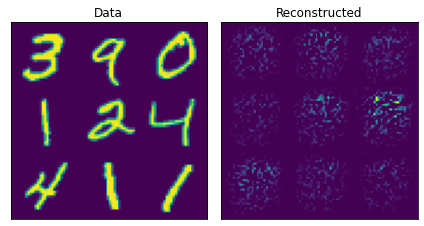

In [64]:
plot_MNIST_reconstruction(Pixels_array,Pixels_r)